In [1]:
#To import all required modules for HW3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import scipy.io
import numpy as np
from glob import glob
import cv2
import pickle
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
#To Load features extracted using VGG16 using pickle 
# open a files, where I stored the pickled data
file1 = open('fc2_model/Fc2_X_train_feature_list.pkl', 'rb')
file2 = open('fc2_model/Fc2_X_valid_feature_list.pkl', 'rb')
file3 = open('fc2_model/Fc2_X_test_feature_list.pkl', 'rb')
file4 = open('fc2_model/Fc2_y_train_feature_list.pkl', 'rb')
file5 = open('fc2_model/Fc2_y_vallid_feature_list.pkl', 'rb')
file6 = open('fc2_model/Fc2_y_test_feature_list.pkl', 'rb')

# dump information 
X_train = pickle.load(file1)
X_valid = pickle.load(file2)
X_test = pickle.load(file3)

y_train = pickle.load(file4)
y_valid = pickle.load(file5)
y_test = pickle.load(file6)

# close the file
file1.close()
file2.close()
file3.close()
file4.close()
file5.close()
file6.close()

#array 


In [3]:
#To convert features list into an array
X_train_data = np.asarray(X_train).reshape(7500,4096)
X_valid_data = np.asarray(X_valid).reshape(1500,4096)
X_test_data = np.asarray(X_test).reshape(1500,4096)

y_train_data = np.asarray(y_train).reshape(7500,15)
y_valid_data = np.asarray(y_valid).reshape(1500,15)
y_test_data = np.asarray(y_test).reshape(1500,15)

#To print arrays shape
print("X_train shape: ", X_train_data.shape)
print("X_valid shape: ", X_valid_data.shape)
print("X_test shape: ", X_test_data.shape)

print("y_train shape: ", y_train_data.shape)
print("y_valid shape: ", y_valid_data.shape)
print("y_test shape: ", y_test_data.shape)


X_train shape:  (7500, 4096)
X_valid shape:  (1500, 4096)
X_test shape:  (1500, 4096)
y_train shape:  (7500, 15)
y_valid shape:  (1500, 15)
y_test shape:  (1500, 15)


In [4]:
y_train_data_new = []
y_valid_data_new = []
y_test_data_new = []

def invert_label(label_array):
    newlist = []
    dataset_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    values = np.asarray(dataset_label)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    for l in label_array:
        inverted = label_encoder.inverse_transform([argmax(l)])
        newlist.append(inverted)
    return newlist

y_train_data_new.append(invert_label(y_train_data))
y_valid_data_new.append(invert_label(y_valid_data))
y_test_data_new.append(invert_label(y_test_data))


y_train_label = np.asarray(y_train_data_new).reshape(7500,1)
y_valid_label = np.asarray(y_valid_data_new).reshape(1500,1)
y_test_label = np.asarray(y_test_data_new).reshape(1500,1)

print("y_train label shape: ", y_train_label.shape)
print("y_valid label shape: ", y_valid_label.shape)
print("y_test label shape: ", y_test_label.shape)

y_train label shape:  (7500, 1)
y_valid label shape:  (1500, 1)
y_test label shape:  (1500, 1)


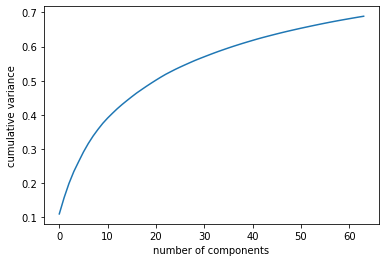

In [5]:
# To compute a PCA 
n_components = 64
h = 64
w = 64

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_data)

eigen_value = pca.components_.reshape((n_components, h, w))

# To Project the input data on pca
X_train_data_pca = pca.transform(X_train_data)
X_valid_data_pca = pca.transform(X_valid_data)
X_test_data_pca = pca.transform(X_test_data)

#To compute LDA:
lda = LinearDiscriminantAnalysis().fit(X_train_data_pca, y_train_label)

X_train_data_lda = lda.transform(X_train_data_pca)
X_valid_data_lda = lda.transform(X_valid_data_pca)
X_test_data_lda = lda.transform(X_test_data_pca)


#To plot cumulative variance corrsponding to the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()


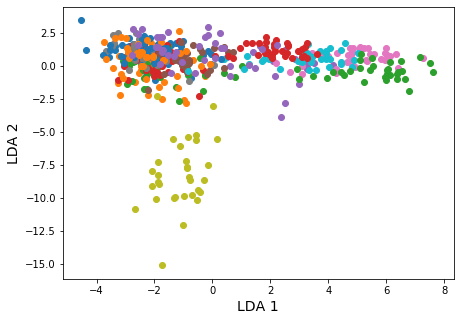

In [6]:
#To plot model 
first_xLDA = X_train_data_lda[:500, :1]
second_yLDA = X_train_data_lda[:500, 1:2]
image_labels= y_train_label[:500]
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for label in np.unique(image_labels):
 label_id=np.where(image_labels==label)
 ax.scatter(first_xLDA[label_id],second_yLDA[label_id])
plt.xlabel("LDA 1",fontsize=14)
plt.ylabel("LDA 2",fontsize=14)
plt.show()


In [7]:
# To Train a SVM classification model
model = SVC(C=1000.0, kernel='rbf', degree=3, gamma=0.0005, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

#To train the model on the X_train_data_lda
model = model.fit(X_train_data_lda, y_train_label)



In [8]:
#To evaluate model on the validation dataset and return score:
validation_accuracy_score = model.score(X_valid_data_lda, y_valid_label)
print("Validation Accuracy Score: ", validation_accuracy_score)

Validation Accuracy Score:  0.8806666666666667


In [9]:
#To predict image class on the test dataset
print("Predicting image class on the test set")

y_pred = model.predict(X_test_data_lda)


print(classification_report(y_test_label, y_pred))
print(confusion_matrix(y_test_label, y_pred, labels=range(1500)))

Predicting image class on the test set
              precision    recall  f1-score   support

           1       0.88      0.84      0.86       100
           2       0.78      0.83      0.80       100
           3       0.76      0.83      0.79       100
           4       0.82      0.78      0.80       100
           5       0.90      0.89      0.89       100
           6       0.91      0.88      0.89       100
           7       0.98      0.96      0.97       100
           8       0.73      0.66      0.69       100
           9       0.97      0.97      0.97       100
          10       0.92      0.97      0.95       100
          11       0.74      0.79      0.76       100
          12       0.84      0.87      0.85       100
          13       0.95      0.92      0.93       100
          14       0.97      0.97      0.97       100
          15       0.90      0.87      0.88       100

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.

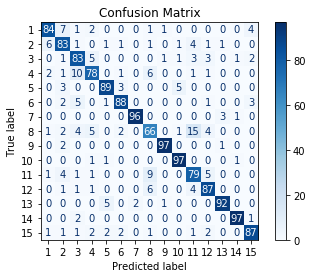

In [10]:
#To plot confusion matrix

fig= plot_confusion_matrix(model, X_test_data_lda, y_test_label, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()